16.09.2024
## TD1 – Structures et quantification

### I. Arrondi et troncature

Créer des fonctions **arr=arrondi(val,MAXI,B)** et **tronc=troncature(val, MAXI,B)** qui renvoient 
respectivement les valeurs arrondies et tronquées sur (**B**+1) bits d’un vecteur ligne de valeurs 
réelles val qui ne devraient pas dépasser la valeur **MAXI** en valeur absolue.

Les vecteurs renvoyés pour chacune des 2 fonctions seront les valeurs numériques quantifiées (entières) multiples de Delta_q (round, floor). 
Pour vérifier leur exactitude, vous pourriez tracer pour *x* 𝜖[−1.4;1.4] (tickslabels pour les multiples de Delta_q).

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def arrondi(val, MAXI, B):
    Delta_q = MAXI * 2**(-(B))  # Step size
    return np.round(val / Delta_q) * Delta_q

def troncature(val, MAXI, B):
    Delta_q = MAXI * 2**(-(B))  # Step size
    return np.floor(val / Delta_q) * Delta_q


val = np.linspace(-1.4, 1.4, 100)  # Vector
MAXI = 1
val_n = val / MAXI
B = 2

arr = arrondi(val_n, MAXI, B)
tronc = troncature(val_n, MAXI, B)

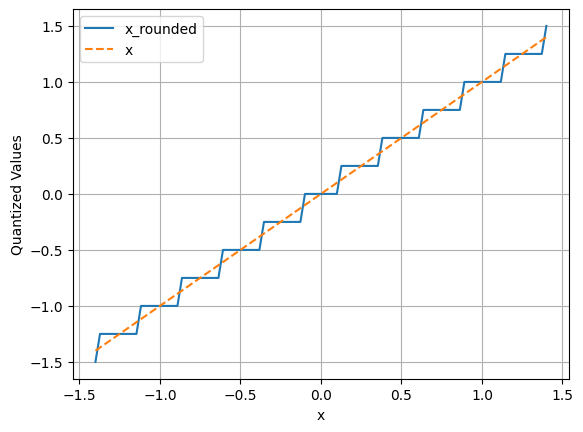

In [6]:
plt.plot(val_n, arr, label='x_rounded')
plt.plot(val_n, val_n, label='x', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Quantized Values')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def quantize_arrondi_troncature(val, maxi, B):
    # Initialisation
    rond = np.zeros_like(val)
    tronc = np.zeros_like(val)
    ind = np.arange(len(val))  # indices
    pas = 1 / 2**B
    Nmax = 2**B

    # Normalisation
    val_norm = val / maxi

    # Suppression des valeurs hors de la plage
    K = np.where(val_norm < -1 + pas / 2)[0]
    rond[K] = -1 * maxi
    tronc[K] = -1 * maxi
    ind = np.delete(ind, K)  # Supprime les indices traités

    K = np.where(val_norm[ind] > 1 - pas)[0]
    rond[ind[K]] = (1 - pas) * maxi
    tronc[ind[K]] = (1 - pas) * maxi
    ind = np.delete(ind, K)  # Supprime les indices traités

    # Arrondi pour les valeurs restantes
    rond[ind] = np.round(Nmax * val_norm[ind]) / Nmax * maxi

    # Troncature pour les valeurs restantes
    tronc[ind] = np.floor(Nmax * val_norm[ind]) / Nmax * maxi

    return rond, tronc


# Application de la fonction pour obtenir l'arrondi et la troncature
rond, tronc = quantize_arrondi_troncature(val, MAXI, B)

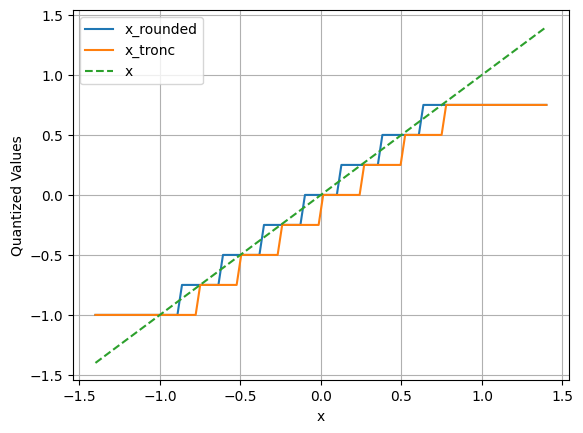

In [8]:
plt.plot(val_n, rond, label='x_rounded')
plt.plot(val_n, tronc, label='x_tronc')
plt.plot(val_n, val_n, label='x', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Quantized Values')
plt.legend()
plt.grid(True)
plt.show()

### II. Structure bi-quad 

La cellule bi-quad est largement implémentée dans les systèmes numériques. Elle mérite donc d’être implémentée par vos soins. Créer la fonction **y=bi_quad(B,A,x)**. Vérifier son fonctionnement par exemple à l’aide des tracés suivants. Les tracés de référence sont calculés grâce à la commande **filter**.

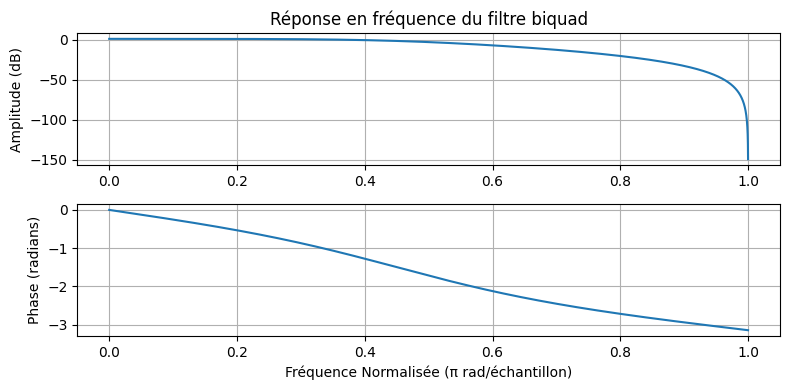

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def bi_quad(B, A, x):
    y = np.zeros_like(x)
    for n in range(2, len(x)):
        y[n] = (B[0] * x[n] + B[1] * x[n-1] + B[2] * x[n-2] 
                - A[1] * y[n-1] - A[2] * y[n-2])
    return y

# Tracer la réponse harmonique
def plot_frequency_response(B, A):
    # Calculer la réponse en fréquence du filtre
    w, h = signal.freqz(B, A, worN=8000)
    
    # Tracer la magnitude de la réponse fréquentielle
    plt.figure(figsize=(8, 4))
    plt.subplot(2, 1, 1)
    plt.plot(w / np.pi, 20 * np.log10(abs(h)))
    plt.title('Réponse en fréquence du filtre biquad')
    plt.ylabel('Amplitude (dB)')
    plt.grid()
    
    # Tracer la phase de la réponse fréquentielle
    plt.subplot(2, 1, 2)
    plt.plot(w / np.pi, np.angle(h))
    plt.ylabel('Phase (radians)')
    plt.xlabel('Fréquence Normalisée (π rad/échantillon)')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# Coefficients du filtre biquad (exemple passe-bas)
B = [0.2929, 0.5858, 0.2929]  # Coefficients du numérateur
A = [1, -0.1212, 0.1716]      # Coefficients du dénominateur

# Tracer la réponse en fréquence
plot_frequency_response(B, A)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def bi_quad(B, A, x):
    y = np.zeros_like(x)
    for n in range(2, len(x)):
        y[n] = (B[0] * x[n] + B[1] * x[n-1] + B[2] * x[n-2] 
                - A[1] * y[n-1] - A[2] * y[n-2])
    return y

# Définir un signal sinusoidal
fs = 100  # Fréquence d'échantillonnage (Hz)
t = np.arange(0, 100, 1/fs)  # Axe temporel de 0 à 100 secondes
f = 1/10  # Fréquence du signal sinusoidal (période 10 secondes)
x = np.sin(2 * np.pi * f * t)  # Signal d'entrée x (sinusoïde)

def update_plot(B0, B1, B2, A1, A2):
    B = [B0, B1, B2]  # Coefficients du numérateur
    A = [1, A1, A2]  # Coefficients du dénominateur
    
    # Appliquer le filtre biquad au signal sinusoidal
    y = bi_quad(B, A, x)
    
    # Tracer les signaux x et y
    plt.figure(figsize=(12, 6))
    plt.plot(t, x, label='Signal d\'entrée (x)')
    plt.plot(t, y, label='Signal filtré (y)', linestyle='--')
    plt.title('Signal d\'entrée et signal filtré')
    plt.xlabel('Temps (secondes)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

# Créer des widgets pour ajuster les coefficients
B0_slider = widgets.FloatSlider(value=0.2929, min=-1.0, max=1.0, step=0.01, description='B0:')
B1_slider = widgets.FloatSlider(value=0.5858, min=-1.0, max=1.0, step=0.01, description='B1:')
B2_slider = widgets.FloatSlider(value=0.2929, min=-1.0, max=1.0, step=0.01, description='B2:')
A1_slider = widgets.FloatSlider(value=-1.5, min=-2.0, max=2.0, step=0.01, description='A1:')
A2_slider = widgets.FloatSlider(value=0.7, min=0.0, max=1.02, step=0.01, description='A2:')

# Créer une interface interactive avec les widgets
ui = widgets.VBox([B0_slider, B1_slider, B2_slider, A1_slider, A2_slider])
out = widgets.interactive_output(update_plot, {
    'B0': B0_slider, 'B1': B1_slider, 'B2': B2_slider,
    'A1': A1_slider, 'A2': A2_slider
})

display(ui, out)


Output()

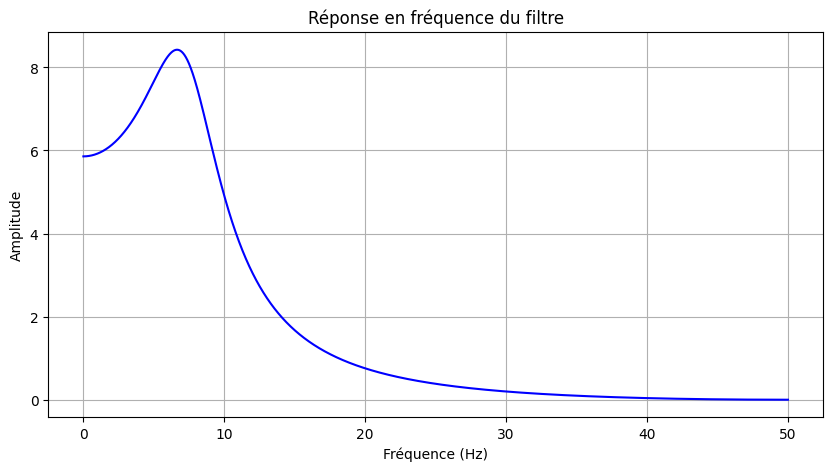

In [13]:
from scipy.signal import freqz

def plot_frequency_response(B, A):
    w, h = freqz(B, A, worN=8000)
    plt.figure(figsize=(10, 5))
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.title('Réponse en fréquence du filtre')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Exemple d'utilisation
B = [0.2929, 0.5858, 0.2929]
A = [1, -1.5, 0.7]
plot_frequency_response(B, A)


On pourrait alors en profiter pour tenter de visualiser les effets de la quantification sur les données puis les coefficients : arrondi, troncature, nombre de bits … Quel est le gain cohérent théorique de votre filtre ? Pour un bruit blanc donné en entrée, à quoi ressemble la sortie et que vaut sa puissance mesurée ?

In [14]:
def calculate_power(signal):
    return np.mean(signal**2)

# Générer un bruit blanc comme entrée
np.random.seed(0)
x = np.random.randn(len(t))

# Appliquer le filtre biquad au bruit blanc
y = bi_quad(B, A, x)

# Calculer la puissance du signal filtré
power_y = calculate_power(y)
print(f'La puissance du signal filtré est : {power_y:.2f}')


La puissance du signal filtré est : 10.58


### III. Structure en cascade 

Réaliser un filtre passe-bande elliptique d’ordre 6 présentant une ondulation de 0,1 dB dans la bande passante ([0,3 ;0,4]) et 40 dB d’atténuation dans la bande atténuée, facile avec la commande **ellip** ! Le décomposer en cellules bi-quad, trivial avec zp2sos !

Calculer les réponses en fréquences théoriques, arrondies et tronquées avec B+1 bits (la quantification ne porte que sur les coefficients des polynômes).

Sur une 1ère figure, tracer à gauche le diagramme des pôles et des zéros et à droite le module de la réponse en fréquence.

Sur une 2nde figure reprendre la 1ère avec cette fois-ci la décomposition en cellules bi-quad. Faire varier le paramètre B de façon à identifier une valeur acceptable selon un critère à définir.

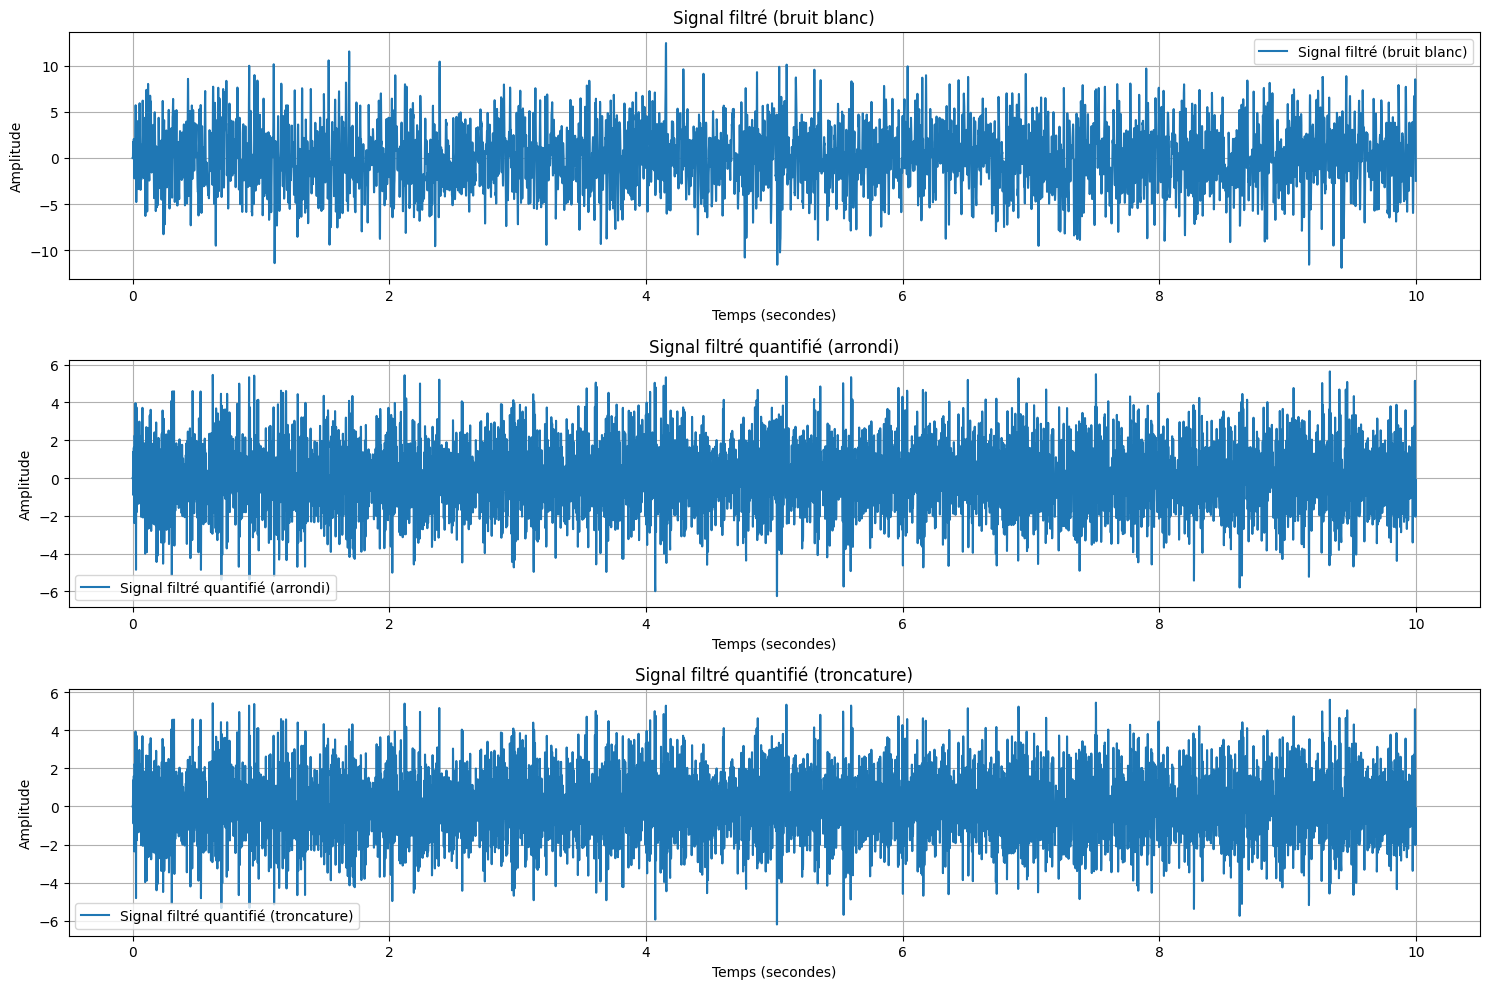

Gain théorique du filtre : 0.12
Gain théorique du filtre quantifié (arrondi) : 0.15
Gain théorique du filtre quantifié (troncature) : 0.14
Puissance du bruit blanc en sortie : 11.14
Puissance du bruit blanc en sortie (arrondi) : 2.84
Puissance du bruit blanc en sortie (troncature) : 2.79


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def bi_quad(B, A, x):
    y = np.zeros_like(x)
    for n in range(2, len(x)):
        y[n] = (B[0] * x[n] + B[1] * x[n-1] + B[2] * x[n-2] 
                - A[1] * y[n-1] - A[2] * y[n-2])
    return y

def quantize_arrondi_troncature(val, maxi, B):
    rond = np.zeros_like(val)
    tronc = np.zeros_like(val)
    ind = np.arange(len(val))  # indices
    pas = 1 / 2**B
    Nmax = 2**B

    # Normalisation
    val_norm = val / maxi

    # Suppression des valeurs hors de la plage
    K = np.where(val_norm < -1 + pas / 2)[0]
    rond[K] = -1 * maxi
    tronc[K] = -1 * maxi
    ind = np.delete(ind, K)  # Supprime les indices traités

    K = np.where(val_norm[ind] > 1 - pas)[0]
    rond[ind[K]] = (1 - pas) * maxi
    tronc[ind[K]] = (1 - pas) * maxi
    ind = np.delete(ind, K)  # Supprime les indices traités

    # Arrondi pour les valeurs restantes
    rond[ind] = np.round(Nmax * val_norm[ind]) / Nmax * maxi

    # Troncature pour les valeurs restantes
    tronc[ind] = np.floor(Nmax * val_norm[ind]) / Nmax * maxi

    return rond, tronc

# Définir le signal de bruit blanc
fs = 1000  # Fréquence d'échantillonnage (Hz)
t = np.arange(0, 10, 1/fs)  # Axe temporel de 0 à 10 secondes
x = np.random.normal(0, 1, len(t))  # Bruit blanc

# Coefficients du filtre
B = [0.2929, 0.5858, 0.2929]
A = [1, -1.5, 0.7]

# Filtrer le bruit blanc
y = bi_quad(B, A, x)

B_bits,A_bits = 8,8

# Quantification des coefficients
max_coeff = 1.0  # Valeur maximale pour normaliser
B_quantized_rond, B_quantized_tronc = quantize_arrondi_troncature(np.array(B), max_coeff, B_bits)
A_quantized_rond, A_quantized_tronc = quantize_arrondi_troncature(np.array(A), max_coeff, A_bits)

# Filtrer avec les coefficients quantifiés
y_quantized_rond = bi_quad(B_quantized_rond, A_quantized_rond, x)
y_quantized_tronc = bi_quad(B_quantized_tronc, A_quantized_tronc, x)

# Calcul du gain théorique (Gain = |H(jω)| à ω = 0)
H_0 = abs(B[0] / (1 - A[1]))  # Approximation simplifiée pour ω = 0
H_0_quantized_rond = abs(B_quantized_rond[0] / (1 - A_quantized_rond[1]))
H_0_quantized_tronc = abs(B_quantized_tronc[0] / (1 - A_quantized_tronc[1]))

# Puissance du bruit blanc en sortie
power_output = np.mean(y**2)
power_output_quantized_rond = np.mean(y_quantized_rond**2)
power_output_quantized_tronc = np.mean(y_quantized_tronc**2)

# Tracer les résultats
plt.figure(figsize=(15, 10))

# Signal filtré
plt.subplot(3, 1, 1)
plt.plot(t, y, label='Signal filtré (bruit blanc)')
plt.title('Signal filtré (bruit blanc)')
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Signal filtré quantifié (arrondi)
plt.subplot(3, 1, 2)
plt.plot(t, y_quantized_rond, label='Signal filtré quantifié (arrondi)', linestyle='-')
plt.title('Signal filtré quantifié (arrondi)')
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Signal filtré quantifié (troncature)
plt.subplot(3, 1, 3)
plt.plot(t, y_quantized_tronc, label='Signal filtré quantifié (troncature)', linestyle='-')
plt.title('Signal filtré quantifié (troncature)')
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Affichage des résultats de la quantification
print(f'Gain théorique du filtre : {H_0:.2f}')
print(f'Gain théorique du filtre quantifié (arrondi) : {H_0_quantized_rond:.2f}')
print(f'Gain théorique du filtre quantifié (troncature) : {H_0_quantized_tronc:.2f}')

print(f'Puissance du bruit blanc en sortie : {power_output:.2f}')
print(f'Puissance du bruit blanc en sortie (arrondi) : {power_output_quantized_rond:.2f}')
print(f'Puissance du bruit blanc en sortie (troncature) : {power_output_quantized_tronc:.2f}')
